<a href="https://colab.research.google.com/github/cavs1010/insuranceModel/blob/main/InsuranceModel_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚑Insurance model

## Imports

In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

## 🛀Preprocessing
Preprocessing steps:
1. One hot encoding.
2. Train and test set split

In [ ]:
# Let's see the dataframe
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Variable types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# One hot encoder for the object columns
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [ ]:
# Create trainig and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
Different models will be proposed:
* `model_1` -  basic neural network.
* `model_2` - change number of neurons
* `model_3` - change the optimizer of `model_1`
* `model_4` - Add epochs to the `model_1`
* `model_5` - Add a hidden layer and change the optimizer of `model_1`
* `model_6` - Increase epochs of `model_5`
* `model_7` - Increase epochs of `model_6`

### Model 1

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                 
])

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_1 = insurance_model_1.fit(X_train, y_train, epochs=100, verbose = 0)

In [ ]:
# Evaluate the large model
mae_model_1 = insurance_model_1.evaluate(X_test, y_test)[1]
mae_model_1

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


7023.3291015625

### Model 2

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(10),                              
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_2 = insurance_model_2.evaluate(X_test, y_test)[1]
mae_model_2

9/9 [==============================] - 0s 1ms/step - loss: 7337.1821 - mae: 7337.1821


7337.18212890625

### Model 3

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),                              
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_3 = insurance_model_3.evaluate(X_test, y_test)[1]
mae_model_3

9/9 [==============================] - 0s 1ms/step - loss: 7539.9517 - mae: 7539.9517


7539.95166015625

### Model 4

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),                              
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
history_4 = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_4 = insurance_model_4.evaluate(X_test, y_test)[1]
mae_model_4

9/9 [==============================] - 0s 2ms/step - loss: 5498.5771 - mae: 5498.5771


5498.5771484375

### Model 5

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_5 = insurance_model_5.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_5 = insurance_model_5.evaluate(X_test, y_test)[1]
mae_model_5

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477


4924.34765625

### Model 6

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_6 = insurance_model_6.fit(X_train,y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_6 = insurance_model_6.evaluate(X_test, y_test)[1]
mae_model_6

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


3491.296142578125

### Model 7

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_7.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history_7 = insurance_model_7.fit(X_train,y_train, epochs=300, verbose=0)

In [ ]:
# Evaluate the large model
mae_model_7 = insurance_model_7.evaluate(X_test, y_test)[1]
mae_model_7

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


3215.86083984375

## Model Evaluation

In [ ]:
model_results = [['model_1', mae_model_1],
                 ['model_2', mae_model_2],
                 ['model_3', mae_model_3],
                 ['model_4', mae_model_4],
                 ['model_5', mae_model_5],
                 ['model_6', mae_model_6],
                 ['model_7', mae_model_7]]
model_results = pd.DataFrame(model_results,columns=['model','MAE'])

In [ ]:
model_results

,model,MAE
0,model_1,7023.329102
1,model_2,7337.182129
2,model_3,7539.951660
3,model_4,5498.577148
4,model_5,4924.347656
5,model_6,3491.296143
6,model_7,3215.860840


In [ ]:
model_results = model_results.sort_values('MAE')

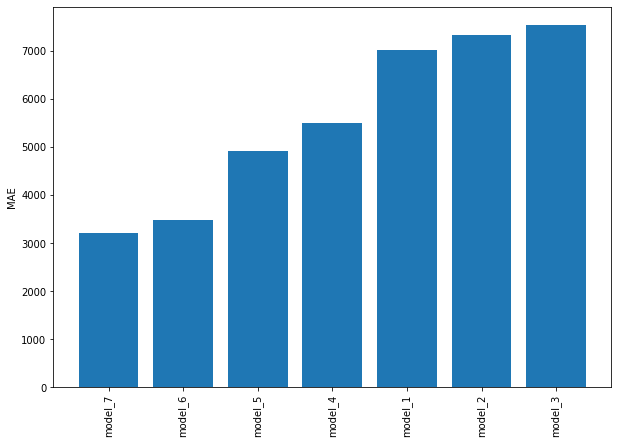

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(model_results['model'], model_results['MAE'])
ax.set_xticklabels(model_results['model'], rotation=90)
ax.set_ylabel('MAE')
plt.show()